# <center> Epoch SC - Unsupervised Learning </center>
## <center> Task - Classification Model </center>

Let's start by importing modules (only a few but too powerful)

In [565]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Loading the Data

In [566]:
df = pd.read_csv("clustering_data.csv")
df.head()

/var/folders/__/qk4sxj291_b28d8s9lk09qwh0000gn/T/ipykernel_1417/3363276229.py:1: DtypeWarning:

Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.



,CircleName,RegionName,DivisionName,OfficeName,Pincode,OfficeType,Delivery,District,StateName,Latitude,Longitude
0,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Peddakotla B.O,515631,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.5689,77.85624
1,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Pinnadhari B.O,515631,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.5281,77.857014
2,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Yerraguntapalle B.O,515631,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.561111,77.85715
3,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Obulareddipalli B.O,515581,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.2488,78.2588
4,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Odulapalli B.O,515581,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.24555,78.2477


#### Data Filtering

First extracting only the pincodes of my state.

In [567]:
#defining state name
state_name = "RAJASTHAN"

#lets get my state from the df
myState = df[df['StateName'] == state_name].copy()


#some of the latitude and longitude values are not in float format. lets convert them to float
#since some of them are of format "98.34 E", we are going to conver them to float by a custom function
def convert(input_value):
    if isinstance(input_value, int) or isinstance(input_value, float): #if it is already read as a number
        return float(input_value)
    
    #if not read as a number, extracting the number 
    number = ''
    for char in input_value:
        if(char.isdigit() or char=='.'):
            number = number + char
        elif(char==" "):
            pass
        else:
            break
    return float(number)

#applying the above function to each of the value
myState['Latitude'] = myState['Latitude'].apply(convert)
myState['Longitude'] = myState['Longitude'].apply(convert)


#lets check how many rows with nan values
print(f"Total Rows: {len(myState)}")
print(f"Rows with NaN : {myState.isna().any(axis=1).sum()}")

Total Rows: 10345
Rows with NaN : 174


Out of 10,345 entries, only 174 of them have na values, lets drop them.

In [568]:
myState = myState.dropna()
len(myState)

10171

Also, lets make sure there are no duplicate entries.

In [569]:
print(f"No. of Duplicate rows: {myState.duplicated().sum()}")

No. of Duplicate rows: 0


That's great, no duplicate rows. 

### Data Visualization

Lets plot the coordinates using their longitudes and latitudes. \
Source for map <a href="https://d-maps.com/carte.php?num_car=9041&lang=en">d-maps.com</a>

(np.float64(-35.928646300000004),
 np.float64(777.0118402999999),
 np.float64(-1.3457138),
 np.float64(80.94655780000001))

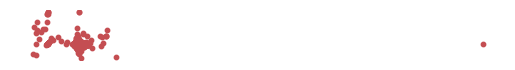

In [570]:
#will use map of rajasthan as background of the plot to make it look better
map_rajasthan = mpimg.imread("rajasthan20.gif")

extent = [69, 79, 23, 31]  #to make sure the maps aligns



plt.imshow(map_rajasthan, extent=extent)
plt.scatter(myState['Longitude'], myState['Latitude'], color="r", s=10,label="locations")
plt.axis(False)

The plot doesnt feel right. looks like a outlier. lets check that

In [571]:
myState['Longitude'].max()

np.float64(740.06)

That is definitely an outlier. Let us remove all those points which does not lie in rajasthan or close to rajasthan. \
source for rajasthan's latitude and longitude extent : <a href="https://mines.rajasthan.gov.in/dmgcms/page?menuName=YzCjPSj/AU7RGgRfpUoY5A==#:~:text=Rajasthan%20is%20located%20in%20the%20north%2Dwestern%20part%20of%20India%20between%20Latitude%2023°03'%2D30°12'%20N%20and%20Longitude%2069°29'%2D%2078°17'E.%20It%20is%20the%20largest%20State%20in%20the%20country%20with%20an%20area%20of%20342%2C%20239%20sq.%20km.%2C%20encompassing%20about%2011%%20of%20the%20total%20geographical%20area%20of%20the%20country."> mines.rajasthan.gov.in </a>

In [572]:
max_lat = 31
min_lat = 23
min_lon = 69 
max_lon = 79

#filtering 
myState = myState[(myState['Latitude'] >= min_lat) & (myState['Latitude'] <= max_lat)]
myState = myState[(myState['Longitude'] >= min_lon) & (myState['Longitude'] <= max_lon)]

Lets try to plot now

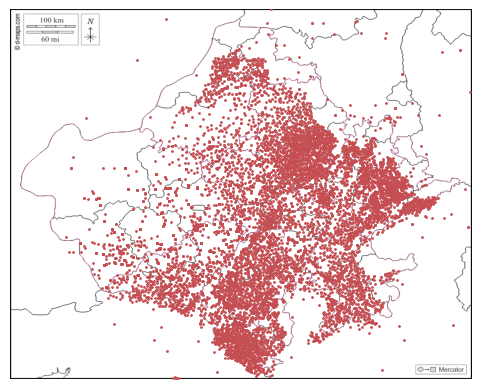

In [573]:
plt.imshow(map_rajasthan, extent=extent)
plt.scatter(myState['Longitude'], myState['Latitude'], color="r", s=1,label="locations")
plt.axis(False)
plt.show()

The plot is a little inbalanced, lets play with the values of `extent` to get the best fit

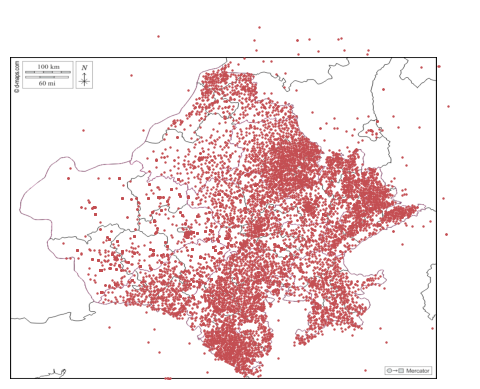

In [574]:
extent = [69, 78.7, 23, 30.3]

plt.imshow(map_rajasthan, extent=extent)
plt.scatter(myState['Longitude'], myState['Latitude'], color="r", s=0.5,label="locations")
plt.axis(False)
plt.show()

Looks better, lets now filter it better on the basis of these values of extent to make it look better

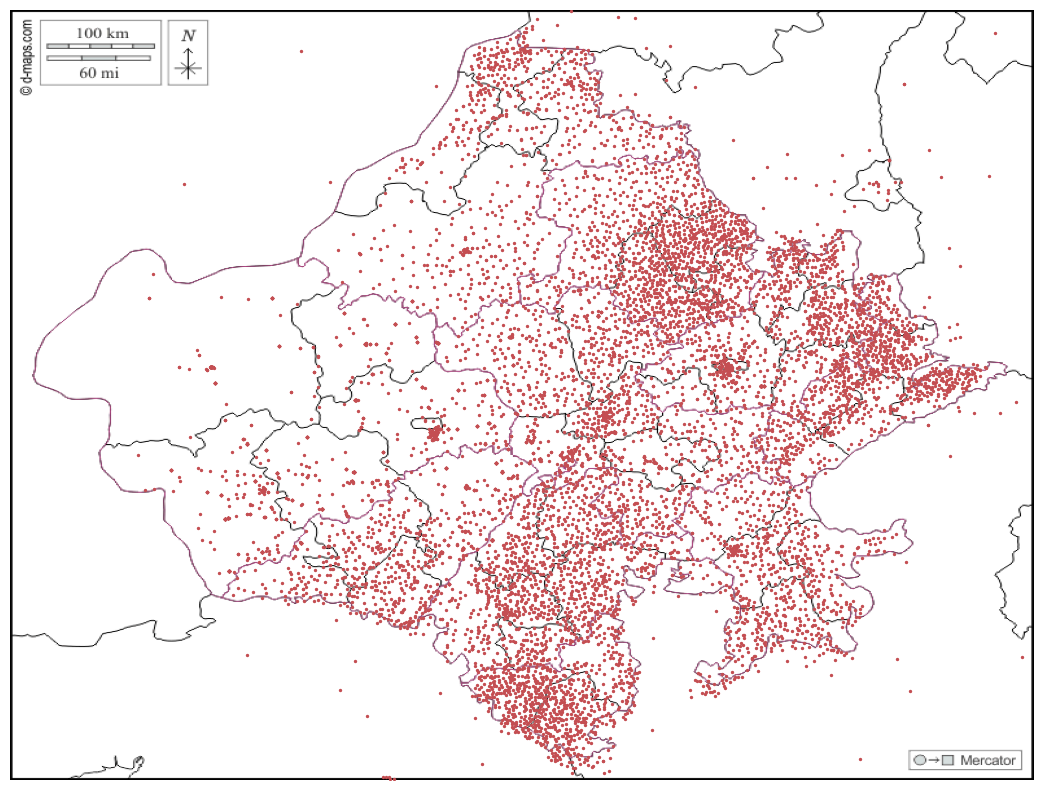

In [575]:
min_lon, max_lon, min_lat, max_lat = extent

#filtering 
myState = myState[(myState['Latitude'] >= min_lat) & (myState['Latitude'] <= max_lat)]
myState = myState[(myState['Longitude'] >= min_lon) & (myState['Longitude'] <= max_lon)]

#plotting
plt.figure(figsize=(20,10))
plt.imshow(map_rajasthan, extent=extent)
plt.scatter(myState['Longitude'], myState['Latitude'], color="r", s=2,label="locations")
plt.axis(False)
plt.show()

This seems better.

### Clustering Analysis

Lets implement the k-means analysis. This will be based on the features `'Latitude'` and `'Longitude'`. This has been modified to include `'Delivery'` feautre also. \
Note that we want to cluster a non-delivery po with delivery po, as the non-delivery po acts as a hub which delivers to the nearby delivery po.

In [576]:
def k_means_clustering(X, k, num_iterations,delivery_weight):
    #initializing centroids randomly from the given points
    indices = np.random.choice(range(len(X)), k, replace=False) 
    centroids = X[indices]

    #learning
    for i in range(num_iterations):

        ###calculating distances
        #initializing empty arrays
        distances           = np.zeros([len(X), k])
        euclidean_distances = np.zeros([len(X), k])
        delivery_distances  = np.zeros([len(X), k])

        #calculating for every centroid
        for i in range(k):
            euclidean_distances[:,i] = np.sqrt(np.sum((X[:, :2] - centroids[i, :2])**2 , axis = 1))
            delivery_distances[:, i] = np.abs(X[:,2] - centroids[i,2])
        distances = euclidean_distances - delivery_weight*delivery_distances

        #assigning label to each of them 
        labels = np.argmin(distances, axis=1) #we assume that centroid on index i is cluster i

        #updating the centroids 
        updated_centroids = np.zeros([k,3])
        
        for i in range(k):
            if(len(X[labels==i]) > 0): #checking if there are points assigned to the cluster
                updated_centroids[i] = np.mean(X[labels==i], axis=0)
            else:
                updated_centroids[i] = centroids[i]

        
        #checking if it has converged so that we can stop earlier
        if(np.array_equal(updated_centroids, centroids)):
            break

        #seems like they got updated, lets update the centroids to our old list
        centroids = updated_centroids.copy()
    
    #learning is done, we can return the clusters
    return centroids, labels    

Now that we have the implementation of the <i> k-means clustering </i>, Lets make a wrapper function that does all the calculation and plotting for us based on the given inputs.

In [577]:
def apply_kmeans(df, k, num_iterations=100, del_weight =1):
    #extracting the "Delivery" column from the datframe
    delivery = df["Delivery"].copy()

    def encode(str):
        if str=="Delivery":
            return 1
        else:
            return 0
        
    delivery = delivery.apply(encode)

    #stacking together to pass to the function
    X = np.vstack([df["Latitude"], df["Longitude"], delivery]).T

    #passing to kmeans
    centroids, labels = k_means_clustering(X, k,num_iterations , del_weight)

    #lets get plotting
    plt.figure(figsize=(10,10))
    colors = ["blue", "red", "green", "orange", "purple", "brown", "pink", "gray", "olive", "cyan", "magenta", "lime", "teal", "indigo", "gold", "maroon", "navy", "coral", "turquoise", "darkgreen", "violet", "chocolate", "crimson", "darkblue"]
    
    #adding our map image
    plt.imshow(map_rajasthan, extent = extent)

    #Plotting clusters with different colours
    for i in range(k):
        cluster_indices = np.where(labels == i)[0]
        if len(cluster_indices) > 0:  # Check if cluster has points
            plt.scatter( X[cluster_indices, 1],  X[cluster_indices, 0], s=2, color=colors[i%24], alpha=0.5, label=f"Cluster {i+1}")

    #plotting centroids 
    plt.scatter( centroids[:, 1], centroids[:, 0], color='black', s=50, marker='x', label="Centroids")

    #completing
    plt.title("K-Means Clustering of Post Offices of Rajasthan")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.legend(loc='best',  fontsize='small') #bbox_to_anchor=(1.05, 1),
    plt.grid(True)
    plt.show()    

    return centroids, labels, X #returning so that can be used later

Now lets put that into action

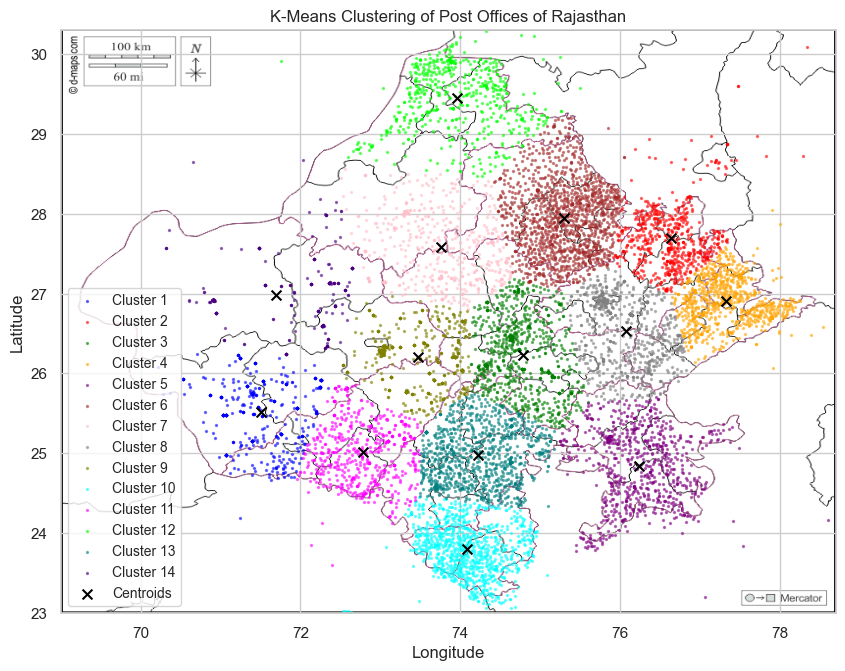

In [578]:
centroids, labels, X = apply_kmeans(myState, 14, 100, del_weight=0) #not considering the delivery difference

This clustering is just based on the approximate distance between two PO's and doesn't provide any great information. \
Let us try finding the optimal $k$ using the WCSS method.

In [579]:
def calculate_WCSS(X,max_k, num_iterations=100,del_weight=1, number_of_trains=10):
    #making array to store values
    wcss = []


    for i in range(max_k):
        current_best = np.inf
        for temp in range(number_of_trains):
            centroids, labels = k_means_clustering(X, i+1, num_iterations, del_weight)
            current = 0
            for j in range(i+1):
                cluster_members = X[labels==j].copy()
                current += np.sum((cluster_members - centroids[j])**2  )
            if(current<current_best):
                current_best = current
        
        wcss.append(current_best)

    #plotting
    plt.figure(figsize=(8,4))
    plt.plot(range(1,k+1), wcss, 'bo-', markersize=5)
    plt.xlabel("k")
    plt.ylabel("WCSS")
    plt.grid(True)
    plt.show()


Lets use this 

ValueError: x and y must have same first dimension, but have shapes (12,) and (25,)

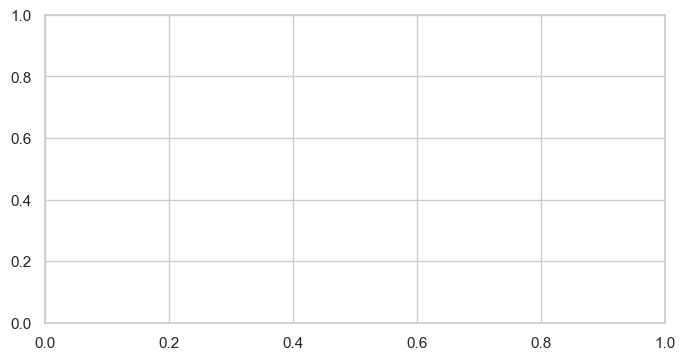

In [580]:
calculate_WCSS(X, 25, 500, 0)

From the graph, it is clear that statistically, the optimal value of $k$ is $4$ acocording to the elbow method. Lets apply kmeans for that value of $k$.

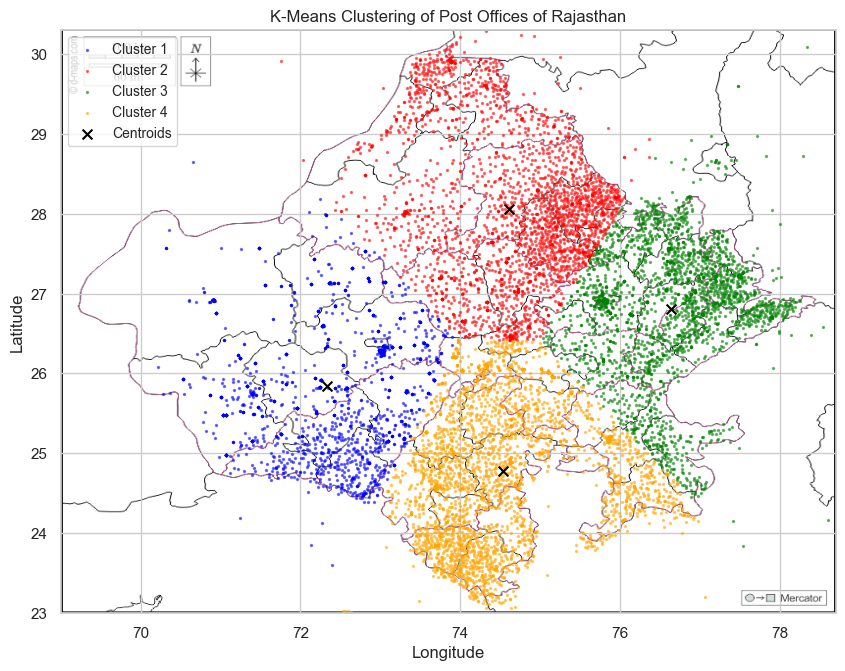

In [ ]:
np.random.seed(43) #so that my markdown remains consistent
centroids, labels, X = apply_kmeans(myState, 4, 500, 0)

This clustering effectively divides Rajasthan into 4 divisions. \
Cluster 1 (Blue)   : Desert areas, relatively lesser population -> lesser POs. \
Cluster 2 (Red)    : Northern Rajasthan areas like Bikaner, Churu. \
Cluster 3 (Green)  :  Urban Areas like Jaipur, Alwar, Bharatpur. Dense POs as the area is industrially viable.\
Cluster 4 (Yellow) : areas like Udaipur, Kota, Bundi, Baran, Jhalawar, Pratapgarh, Banswara. Economically and Infrastructurally developed areas. 

Lets now consider the `'Delivery'` feature for making the clusters.

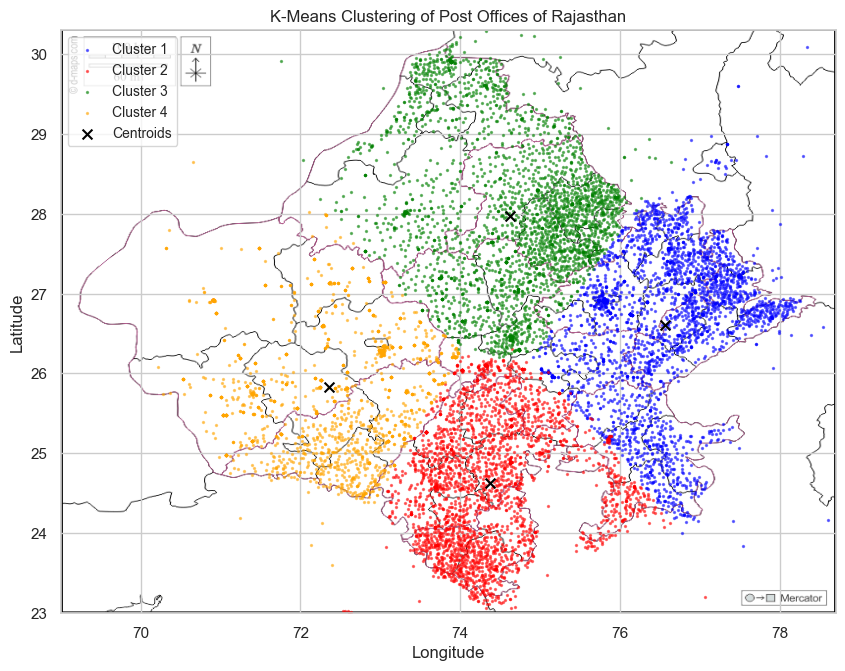

In [ ]:
np.random.seed(42)
centroids, labels, X = apply_kmeans(myState, 4,500,10)

The plot doesnt seem to change much if we consider the delivery distances dfor $k=4$, this suggests that each cluster has a balanced number of "Delivery" and "Non Delivery" PO.

 For some new information lets consider $k=6$ so that we get more insights. We are choosing $k=6$ because it seems to be giving more insights about the data visually.

First lets plot for $k=6$ without considering delivery distance

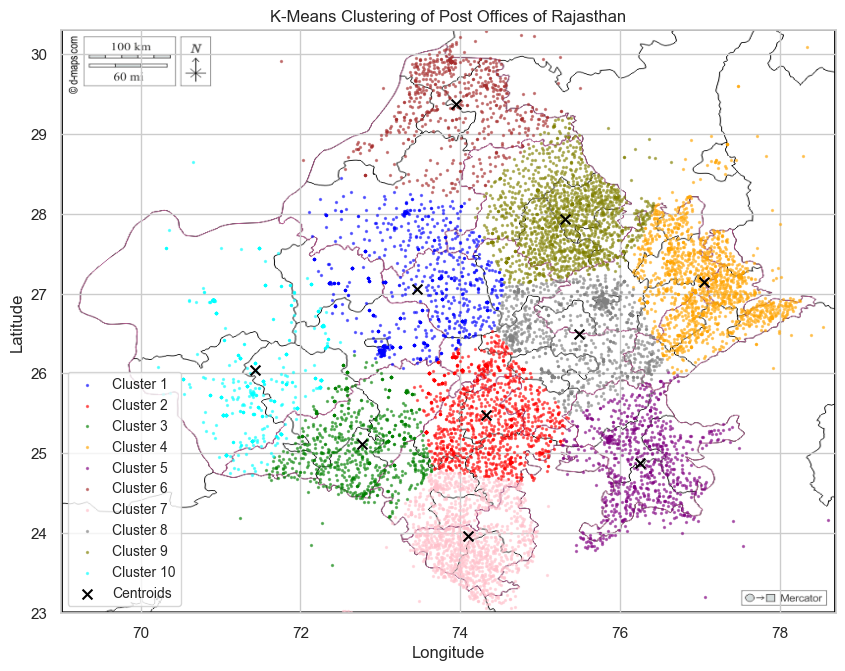

In [ ]:
np.random.seed(10)
centroids, labels, X = apply_kmeans(myState, 10, 500, 0)

Now lets cluster while considering the delivery distances

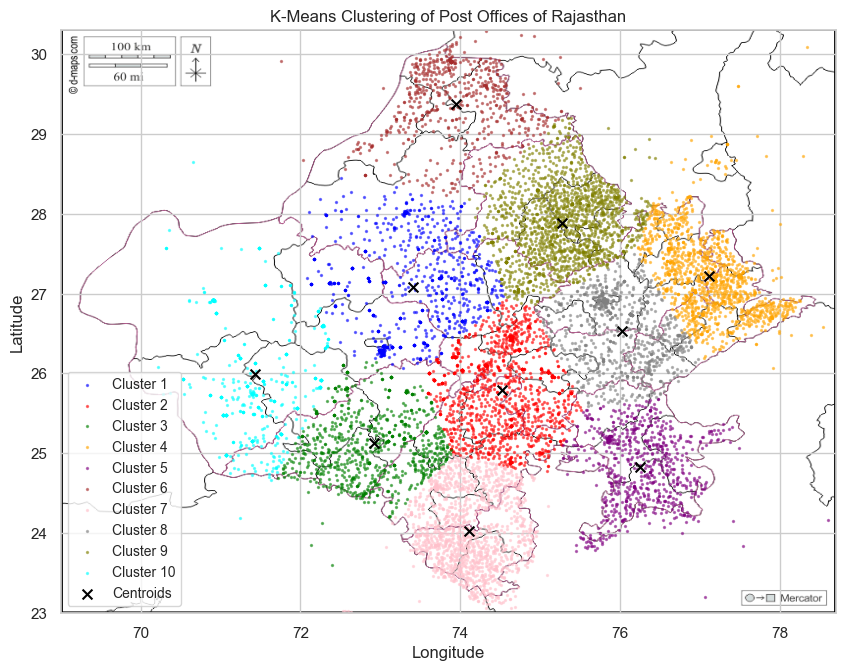

In [ ]:
np.random.seed(10)
centroids, labels, X  = apply_kmeans(myState,10, 500, 1)

On careful observation, it is noticeable that the graph is almost similar to that of without considering delivery distance. But there are few differneces, like for the 'peach' and the 'red' clusters, there is a difference in both the plots. This suggests that though those points are geographicallly closer to the red centroid, their optimal delivery hub should be a "Non-delivery" PO that belongs to the 'peach' cluster.